In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
cloud_df = pd.read_csv("output_metrics_cloud.csv")
edge_df = pd.read_csv("output_metrics_edge.csv")
hybrid_df = pd.read_csv("output_metrics_hybrid.csv")
sw_df = pd.read_csv("output_metrics_oblique.csv")

In [15]:
cloud_df['latency'].quantile([0.95, 0.96, 0.97, 0.98, 0.99])

0.95    300.073439
0.96    300.094506
0.97    300.114286
0.98    300.148563
0.99    300.219462
Name: latency, dtype: float64

In [16]:
edge_df['latency'].quantile([0.95, 0.96, 0.97, 0.98, 0.99])

0.95    300.015245
0.96    300.015808
0.97    300.016994
0.98    300.018898
0.99    300.023339
Name: latency, dtype: float64

In [17]:
hybrid_df['latency'].quantile([0.95, 0.96, 0.97, 0.98, 0.99])

0.95    300.013209
0.96    300.013860
0.97    300.014539
0.98    300.016126
0.99    300.018906
Name: latency, dtype: float64

In [18]:
sw_df['latency'].quantile([0.95, 0.96, 0.97, 0.98, 0.99])

0.95    149.129914
0.96    187.940636
0.97    250.483416
0.98    300.079688
0.99    300.110469
Name: latency, dtype: float64

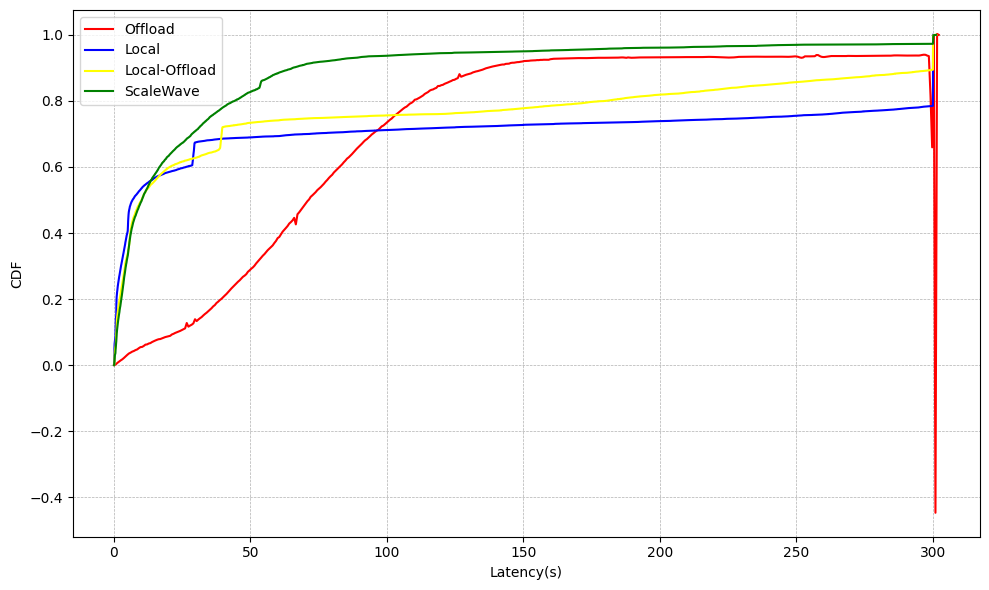

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Define resources to plot
resources = [
    'latency'
]

# Define labels for the deployments
labels = ['Offload', 'Local', 'Local-Offload', 'ScaleWave']

# Define updated colors for the lines, including green for Cloud
# updated_colors = ['#00FF00', '#FF69B4', '#FFA500', '#87CEEB']  # Green, HotPink, Orange, SkyBlue
updated_colors = ['red', 'blue', 'yellow', 'green']

# Function to plot smooth CDF with custom colors and grid
def plot_smooth_cdf(data, labels, resource_name, colors):
    plt.figure(figsize=(10, 6))
    for df, label, color in zip(data, labels, colors):
        # Calculate CDF
        values = np.sort(df[resource_name])
        # values = np.sort(df[df['status_code'] == 200]['latency'])
        cdf = np.arange(1, len(values) + 1) / len(values)
        
        # Make the curve smooth
        try:
            spline = make_interp_spline(values, cdf)
            smooth_values = np.linspace(values.min(), values.max(), 500)
            smooth_cdf = spline(smooth_values)
            plt.plot(smooth_values, smooth_cdf, label=label, color=color)
        except Exception as e:
            # In case of an error with interpolation, plot the original CDF
            plt.plot(values, cdf, label=label, color=color)
    
    # plt.title(f'CDF of {resource_name}')
    plt.xlabel('Latency(s)')
    plt.ylabel('CDF')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    fig_name = "c35_success_latency_cdf"
    plt.savefig(f'{fig_name}.png')
    plt.show()

# Plot smooth CDF for each resource with updated colors
for resource in resources:
    data = [cloud_df, edge_df, hybrid_df, sw_df]
    plot_smooth_cdf(data, labels, resource, updated_colors)

In [20]:
cloud_df['latency'].describe(percentiles=[.85, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

count    8846.000000
mean       84.897616
std        67.007679
min         0.025757
50%        71.245473
85%       120.649973
90%       136.707742
91%       142.074105
92%       150.404367
93%       174.222356
94%       300.018177
95%       300.073439
96%       300.094506
97%       300.114286
98%       300.148563
99%       300.219462
max       302.144479
Name: latency, dtype: float64

In [21]:
edge_df['latency'].describe(percentiles=[.85, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

count    8846.000000
mean       87.326162
std       125.348587
min         0.020757
50%         6.797410
85%       300.012443
90%       300.013565
91%       300.013832
92%       300.014186
93%       300.014494
94%       300.014837
95%       300.015245
96%       300.015808
97%       300.016994
98%       300.018898
99%       300.023339
max       300.115618
Name: latency, dtype: float64

In [22]:
hybrid_df['latency'].describe(percentiles=[.8, .85, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

count    8846.000000
mean       70.247977
std       106.625951
min         0.033260
50%        10.115672
80%       180.068367
85%       241.125262
90%       300.010701
91%       300.011304
92%       300.011745
93%       300.012204
94%       300.012743
95%       300.013209
96%       300.013860
97%       300.014539
98%       300.016126
99%       300.018906
max       301.257806
Name: latency, dtype: float64

In [23]:
sw_df['latency'].describe(percentiles=[.8, .85, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

count    8846.000000
mean       31.676725
std        57.984036
min         0.029997
50%        10.200362
80%        44.069938
85%        53.630153
90%        65.473982
91%        69.779518
92%        77.435511
93%        87.443114
94%       106.882730
95%       149.129914
96%       187.940636
97%       250.483416
98%       300.079688
99%       300.110469
max       301.161379
Name: latency, dtype: float64

In [9]:
offload_latencies = cloud_df[cloud_df['status_code'] == 200]['latency'].describe(percentiles=[.25, .50, .75, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

In [10]:
local_latencies=edge_df[edge_df['status_code'] == 200]['latency'].describe(percentiles=[.25, .50, .75, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

In [11]:
local_offload_latencies=hybrid_df[hybrid_df['status_code'] == 200]['latency'].describe(percentiles=[.25, .50, .75, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

In [12]:
scalewave_latencies=sw_df[sw_df['status_code'] == 200]['latency'].describe(percentiles=[.25, .50, .75, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

In [13]:
offload_latencies.to_csv("offload_latencies_c35.csv", index=False)
local_latencies.to_csv("local_latencies_c35.csv", index=False)
local_offload_latencies.to_csv("local_offload_latencies_c35.csv", index=False)
scalewave_latencies.to_csv("scalewave_latencies_c35.csv", index=False)